[View in Colaboratory](https://colab.research.google.com/github/Bibo1218/Coding-Cheat-Sheets/blob/master/ex00_data_exploration.ipynb)

## 確認套件已經安裝

In [0]:
!apt -qq install proj-bin libproj-dev libgeos-dev
import pip
from pip._internal import main
try:
    package = 'https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz'
    __import__('mpl_toolkits.basemap')
except ImportError:
    main(['install', package])

!pip install -q requests

libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

from google.colab import files

from mpl_toolkits.basemap import Basemap
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import requests

## 下載並開啟資料檔，將內容存放到變數 `pkgo`

In [0]:
# 設定 GitHub 下載網址
data_file = '300k.csv.bz2'
dataset_url = 'https://github.com/hdyen/hands-on-dl/raw/master/PKGO/dataset/'
data_url = '{}{}'.format(dataset_url, data_file)

if not os.path.exists(data_file):
    try:
        r = requests.get(data_url)
        # 將從 GitHub 下戴的資料集寫入 colab 本地端
        with open(data_file, 'wb') as f:
            f.write(r.content)
    except:
        # 如果無法從 GitHub 下戴資料，則自行上傳 300k.csv.bz2
        print('請將本機端的資料 300k.csv.bz2 上傳到 colab 環境')
        uploaded = files.upload()

pkgo = pd.read_csv(data_file, low_memory=False)

# 原始資料一覽

## 觀察 `pkgo` 資料的部分欄位

In [0]:
pkgo.shape

(296021, 208)

In [0]:
pd.set_option('display.max_columns', pkgo.shape[-1])
pkgo.head(1)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,True,True,True,False,0.049869,True,True,True,True,True,True,0.081776,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16


In [0]:
pd.set_option('display.max_columns', pkgo.shape[-1])
view_list = ['latitude', 'longitude', 'appearedLocalTime',
             'closeToWater', 'terrainType',
             'temperature', 'windSpeed', 'class']
pkgo[view_list].head(10)

,latitude,longitude,appearedLocalTime,closeToWater,terrainType,temperature,windSpeed,class
0,20.525745,-97.460829,2016-09-08T03:57:45,False,14,25.5,4.79,16
1,20.523695,-97.461167,2016-09-08T03:57:37,False,14,25.5,4.79,133
2,38.903590,-77.199780,2016-09-08T03:57:25,False,13,24.2,4.29,16
3,47.665903,-122.312561,2016-09-08T03:56:22,True,0,15.6,5.84,13
4,47.666454,-122.311628,2016-09-08T03:56:08,True,0,15.6,5.84,133
5,-31.954980,115.853609,2016-09-08T03:55:58,False,13,16.5,6.39,21
6,-31.954245,115.852038,2016-09-08T03:55:25,False,13,16.5,6.40,66
7,26.235257,-98.197591,2016-09-08T03:55:18,False,13,28.0,11.26,27
8,20.525554,-97.458800,2016-09-08T03:55:01,False,14,25.5,4.79,35
9,32.928558,-84.340278,2016-09-08T03:54:50,False,8,23.7,3.94,19


In [0]:
print('pkgo 一共有 {} 筆資料樣本，{} 個資料欄位'.format(pkgo.shape[0], pkgo.shape[1]))

pkgo 一共有 296021 筆資料樣本，208 個資料欄位


## 寶可夢出現的位置

In [0]:
pkgo[['city', 'latitude', 'longitude']].head(10)

,city,latitude,longitude
0,Mexico_City,20.525745,-97.460829
1,Mexico_City,20.523695,-97.461167
2,New_York,38.903590,-77.199780
3,Los_Angeles,47.665903,-122.312561
4,Los_Angeles,47.666454,-122.311628
5,Perth,-31.954980,115.853609
6,Perth,-31.954245,115.852038
7,Chicago,26.235257,-98.197591
8,Mexico_City,20.525554,-97.458800
9,New_York,32.928558,-84.340278


## 只看表格不是那麼清楚，從地圖來了解寶可夢出沒的地方

In [0]:
def map_plot(pkgo):
    plt.figure(1, figsize=(20,10))
    m1 = Basemap(projection='merc',
                 llcrnrlat=-60,
                 urcrnrlat=65,
                 llcrnrlon=-180,
                 urcrnrlon=180,
                 lat_ts=0,
                 resolution='c')

    m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
    m1.drawmapboundary(fill_color='#000000')                # black background
    m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

    # Plot the data
    x, y = m1(pkgo.longitude.tolist(), pkgo.latitude.tolist())
    m1.scatter(x,y, s=3, c="#99ccff", lw=0, alpha=1, zorder=5)
    plt.title("Pokemon activity")
    plt.show()

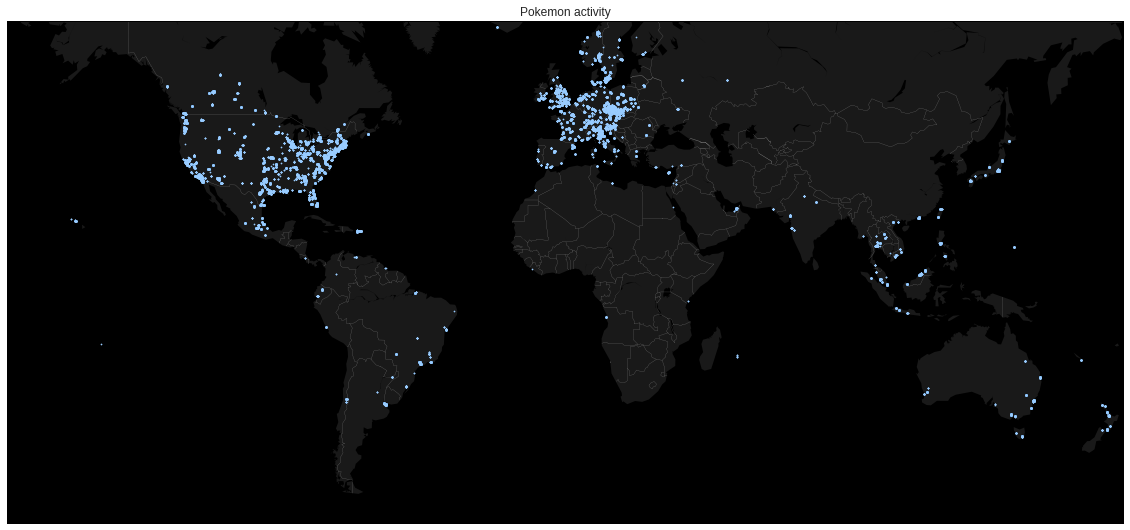

In [0]:
map_plot(pkgo)

## 我們把範圍縮小到紐約市

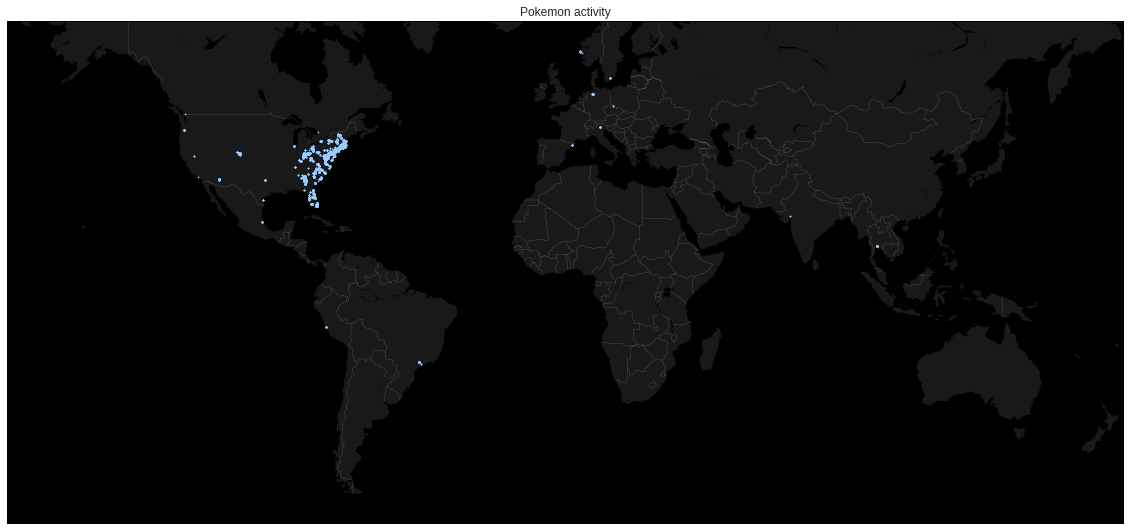

In [0]:
pkgo = pkgo[pkgo.city=='New_York']
map_plot(pkgo)

## 讓我們從經緯度的分佈來看看

### 經緯度平面圖

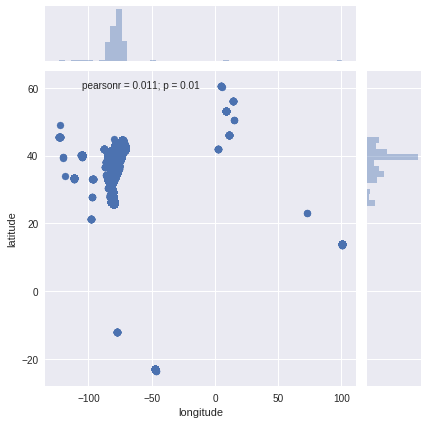

In [0]:
sns.jointplot(x='longitude', y='latitude', data=pkgo)

### 設定經緯度範圍，將資料集縮限在 New York 市周遭

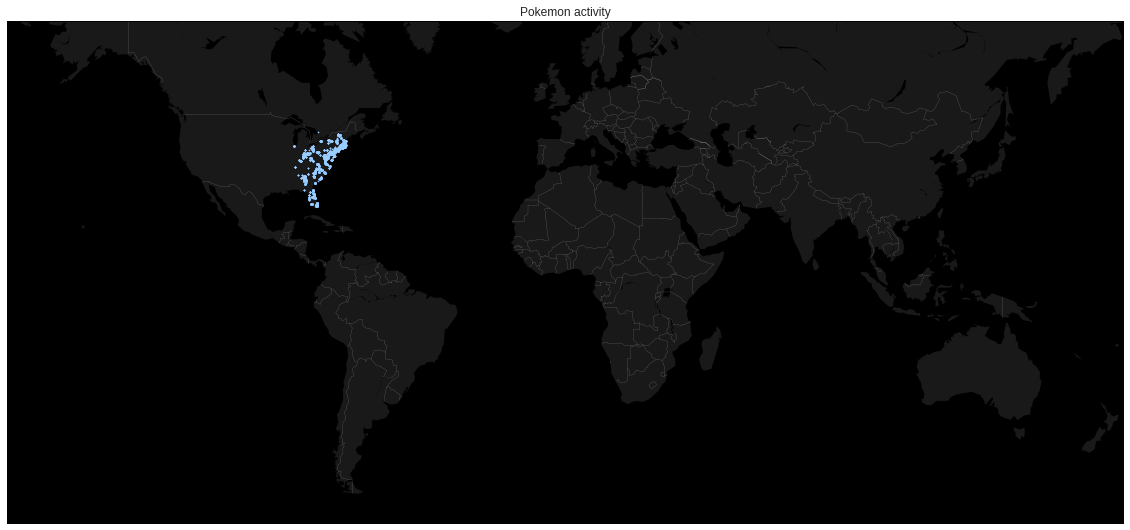

In [0]:
pkgo = pkgo[ (-90 < pkgo['longitude']) & (pkgo['longitude'] < -50) & 
            (20 < pkgo['latitude']) & (pkgo['latitude']< 50)]

map_plot(pkgo)

## 挑選五隻寶可夢作為分類目標
### 留下 小火龍(No.04)、走路草(No.43)、猴怪(No.56)、口呆花(No.71)、大鉗蟹(No.98)

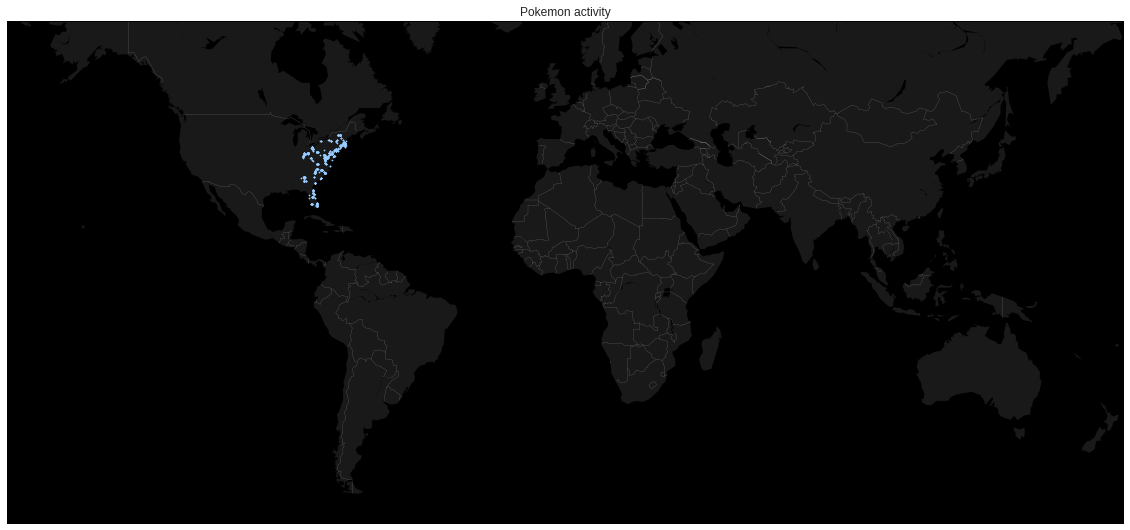

In [0]:
# 小火龍(No.04)、走路草(No.43)、猴怪(No.56)、口呆花(No.71)、大鉗蟹(No.98)
pokemons = [pkgo[pkgo['class']==(i)] for i in [4, 43, 56, 71, 98]]
pkgo = pd.concat(pokemons)

map_plot(pkgo)

## 處理名目資料 (Nominal variables)

### 標籤編碼：手動編碼

#### 以 `appearedDayOfWeek` 為例，處理前

In [0]:
col_list = ['latitude', 'longitude', 
            'appearedDayOfWeek', 'class']
pkgo[col_list].iloc[[i for i in range(1, 1000, 150)]] # 取出[1, 151, 301, 451, 601, 751, 901]筆資料

,latitude,longitude,appearedDayOfWeek,class
1934,39.645433,-77.706083,dummy_day,4
131362,40.151604,-83.025858,Friday,4
22551,38.910891,-77.207686,Sunday,43
66227,38.894184,-77.076638,Saturday,43
109087,33.790799,-84.370757,Saturday,43
163859,38.954388,-77.385331,Friday,43
190698,44.342801,-72.758997,Thursday,43


**處理前，`appearedDayOfWeek` 的值如下**

In [0]:
set(pkgo['appearedDayOfWeek'])

{'Friday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'dummy_day'}

#### 手動編碼

In [0]:
label_map = {'dummy_day': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday':3,
             'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

pkgo['appearedDayOfWeek'] = pkgo['appearedDayOfWeek'].map(label_map)
set(pkgo['appearedDayOfWeek'])

{0, 2, 3, 4, 5, 6, 7}

#### 以 `appearedDayOfWeek` 為例，處理後

**處理後，`appearedDayOfWeek` 的值如下**

In [0]:
set(pkgo['appearedDayOfWeek'])

{0, 2, 3, 4, 5, 6, 7}

In [0]:
col_list = ['latitude', 'longitude', 
            'appearedDayOfWeek', 'class']
pkgo[col_list].iloc[[i for i in range(1, 1000, 150)]]

,latitude,longitude,appearedDayOfWeek,class
1934,39.645433,-77.706083,0,4
131362,40.151604,-83.025858,5,4
22551,38.910891,-77.207686,7,43
66227,38.894184,-77.076638,6,43
109087,33.790799,-84.370757,6,43
163859,38.954388,-77.385331,5,43
190698,44.342801,-72.758997,4,43


### 標籤編碼：自動編碼

#### 以 `weather` 為例，處理前

In [0]:
col_list = ['latitude', 'longitude', 
            'weather', 'class']
pkgo[col_list].iloc[[i for i in range(1, 1500, 200)]]

,latitude,longitude,weather,class
1934,39.645433,-77.706083,Clear,4
179881,39.435836,-77.389457,Clear,4
45385,40.148604,-75.284135,PartlyCloudy,43
109087,33.790799,-84.370757,Clear,43
169284,40.059611,-84.250722,Clear,43
239788,40.393162,-80.007857,PartlyCloudy,43
114108,33.789392,-84.372317,Clear,56
38826,34.999095,-80.754308,Clear,98


**處理前，`weather` 欄位的值如下 **

In [0]:
set(pkgo['weather'])

{'Breezy',
 'BreezyandOvercast',
 'BreezyandPartlyCloudy',
 'Clear',
 'Drizzle',
 'DrizzleandBreezy',
 'LightRain',
 'LightRainandBreezy',
 'MostlyCloudy',
 'Overcast',
 'PartlyCloudy',
 'Rain',
 'RainandWindy'}

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(pkgo['weather'].unique())
list(le.classes_)
pkgo['weather'] = le.transform(pkgo['weather'].values)

#### 以 `weather` 為例，處理後

In [0]:
col_list = ['latitude', 'longitude', 
            'weather', 'class']
pkgo[col_list].iloc[[i for i in range(1, 1500, 200)]]

,latitude,longitude,weather,class
1934,39.645433,-77.706083,3,4
179881,39.435836,-77.389457,3,4
45385,40.148604,-75.284135,10,43
109087,33.790799,-84.370757,3,43
169284,40.059611,-84.250722,3,43
239788,40.393162,-80.007857,10,43
114108,33.789392,-84.372317,3,56
38826,34.999095,-80.754308,3,98


** 處理後，`weather` 欄位的值如下 **

In [0]:
set(pkgo['weather'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}